In [ ]:
import mne
import matplotlib.pyplot as plt

In [26]:
# -------------------------
# 1. Load GDF file
# -------------------------
# Change this path to your actual file
file_path = "../data/raw/A01T.gdf"
raw = mne.io.read_raw_gdf(file_path, preload=True)

print("Channels:", raw.ch_names)
print("Sampling frequency:", raw.info['sfreq'])

Extracting EDF parameters from c:\Users\steve\OneDrive\Documentos\Personal Projects\DataScienceDL\data\raw\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\Users\steve\anaconda3\envs\py310env\lib\contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Channels: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']
Sampling frequency: 250.0


In [35]:
for idx, proj in enumerate(raw.info['projs']):
    print(idx, proj['desc'], proj['active'], proj['data']['col_names'])



0 Average EEG reference False ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']


In [37]:
# -------------------------
# 2. Set channel types (Option A fix)
# -------------------------

# First 22 = EEG, Last 3 = EOG
eeg_chs = raw.ch_names[:22]
eog_chs = raw.ch_names[22:]

# 1. Remove the Average EEG reference projector
raw.del_proj(0)   # index 0 from your earlier inspection

# 2. Set channel types
raw.set_channel_types({ch: 'eeg' for ch in eeg_chs})
raw.set_channel_types({ch: 'eog' for ch in eog_chs})

# 3. Re‑add the average reference (will now skip EOG channels)
raw.set_eeg_reference('average', projection=True)


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MiB, data loaded>

In [38]:
#Match EEG channels to standard 10-20 system
mapping = {
    'EEG-Fz':  'Fz',
    'EEG-0':   'FC3',
    'EEG-1':   'FC1',
    'EEG-2':   'C1',
    'EEG-3':   'C5',
    'EEG-4':   'CP3',
    'EEG-5':   'CP1',
    'EEG-C3':  'C3',
    'EEG-6':   'FCz',
    'EEG-Cz':  'Cz',
    'EEG-7':   'CPz',
    'EEG-C4':  'C4',
    'EEG-8':   'FC4',
    'EEG-9':   'FC2',
    'EEG-10':  'C2',
    'EEG-11':  'C6',
    'EEG-12':  'CP4',
    'EEG-13':  'CP2',
    'EEG-14':  'P3',
    'EEG-Pz':  'Pz',   # already matches
    'EEG-15':  'P1',
    'EEG-16':  'P4',
    # EOG channels — keep or rename for clarity
    'EOG-left':     'EOG1',
    'EOG-central':  'EOG2',
    'EOG-right':    'EOG3',
}


In [46]:
# Check channel names
print("Before rename:", raw.ch_names)

# Only rename if expected keys are present
if any(ch.startswith("EEG-") for ch in raw.ch_names):
    raw.rename_channels(mapping)
    print("Renamed to:", raw.ch_names)
else:
    print("No renaming needed — already in standard format.")


Before rename: ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']
Renamed to: ['Fz', 'FC3', 'FC1', 'C1', 'C5', 'CP3', 'CP1', 'C3', 'FCz', 'Cz', 'CPz', 'C4', 'FC4', 'FC2', 'C2', 'C6', 'CP4', 'CP2', 'P3', 'Pz', 'P1', 'P4', 'EOG1', 'EOG2', 'EOG3']


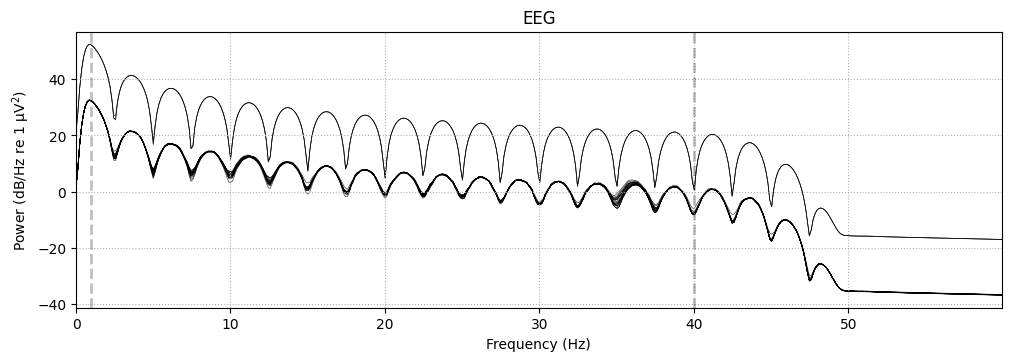

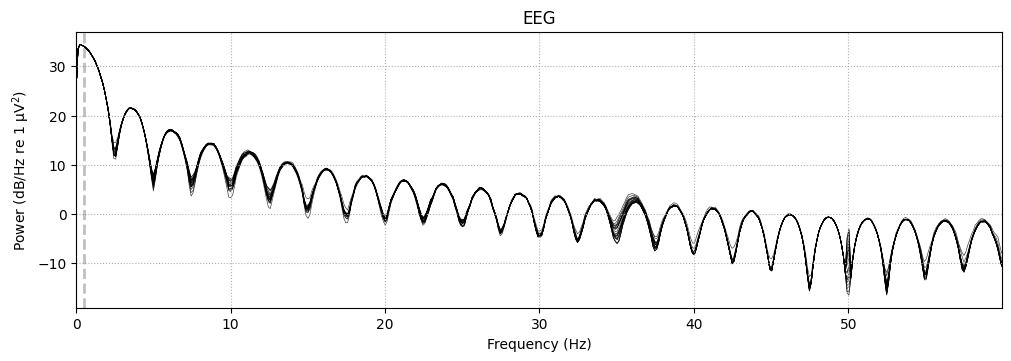

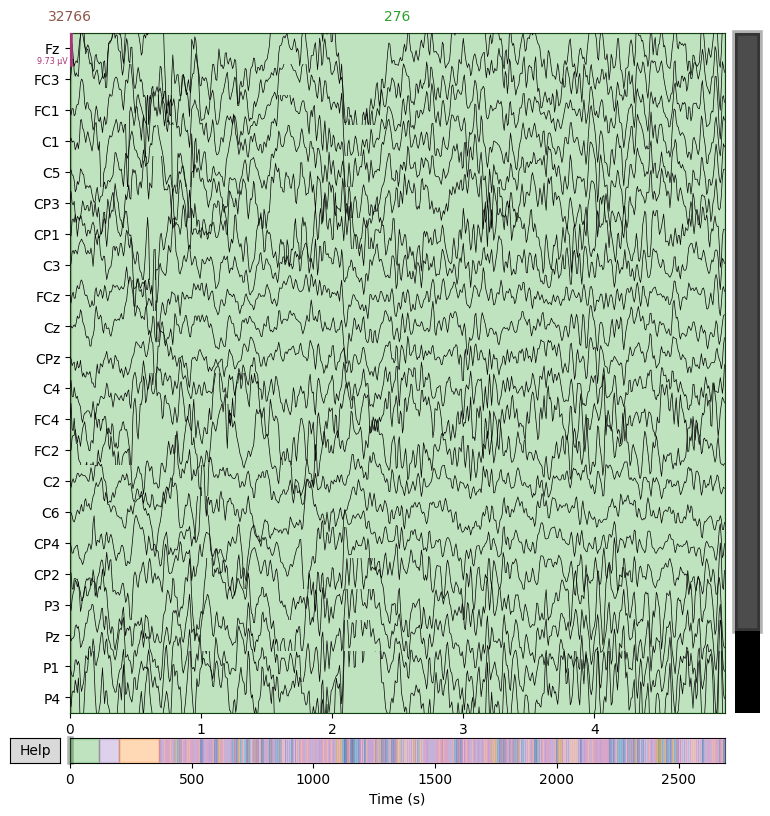

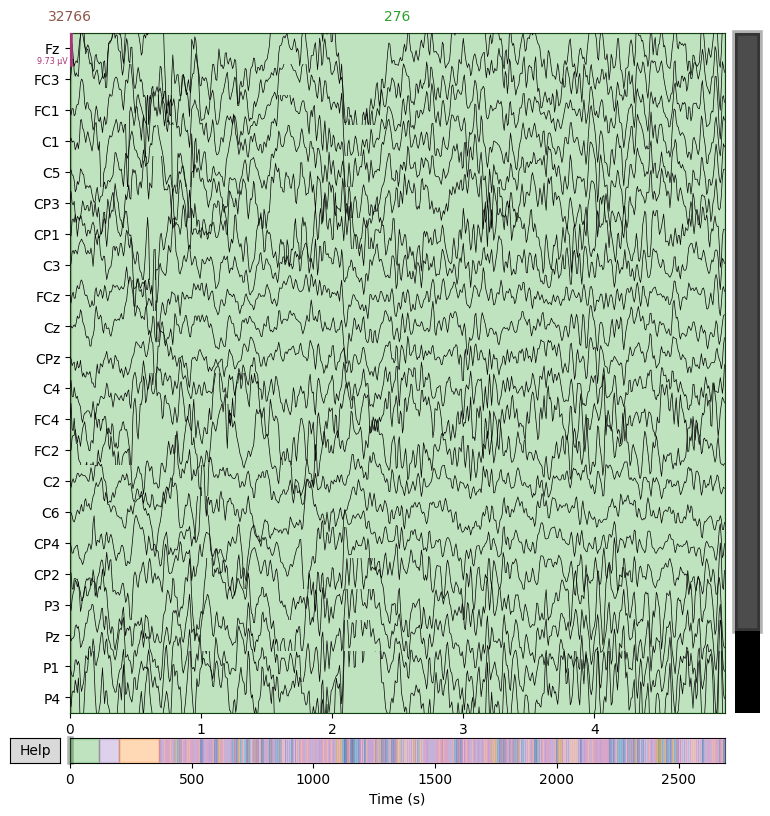

In [47]:
# --- 4. Plot raw EEG signals ---
raw.plot(n_channels=22, duration=5, scalings='auto')

In [39]:
# --- 5. Extract events and event IDs ---
events, event_ids = mne.events_from_annotations(raw)
print("\nEvent IDs:", event_ids)
print("Number of events detected:", len(events))

Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]

Event IDs: {np.str_('1023'): 1, np.str_('1072'): 2, np.str_('276'): 3, np.str_('277'): 4, np.str_('32766'): 5, np.str_('768'): 6, np.str_('769'): 7, np.str_('770'): 8, np.str_('771'): 9, np.str_('772'): 10}
Number of events detected: 603


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\Users\steve\AppData\Local\Temp\ipykernel_27028\1013159468.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=60)
c:\Users\steve\anaconda3\envs\py310env\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


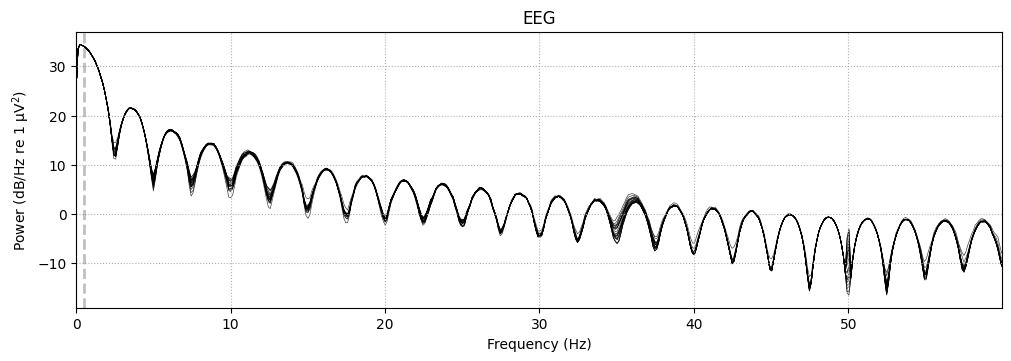

In [40]:
# --- 6. Plot Power Spectral Density (PSD) ---
raw.plot_psd(fmax=60)

In [41]:
# --- 7. Filtering ---
raw.filter(1., 40., fir_design='firwin')  # Keep 1–40 Hz range

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MiB, data loaded>

In [42]:
# --- 8. Re-referencing ---
raw.set_eeg_reference('average', projection=True)

EEG channel type selected for re-referencing


C:\Users\steve\AppData\Local\Temp\ipykernel_27028\3292150008.py:2: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference('average', projection=True)


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MiB, data loaded>

In [49]:
# -------------------------
#  Set montage (10-20 cap)
# -------------------------

montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MiB, data loaded>

Fitting ICA to data using 22 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 20 components
    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 17.0s.


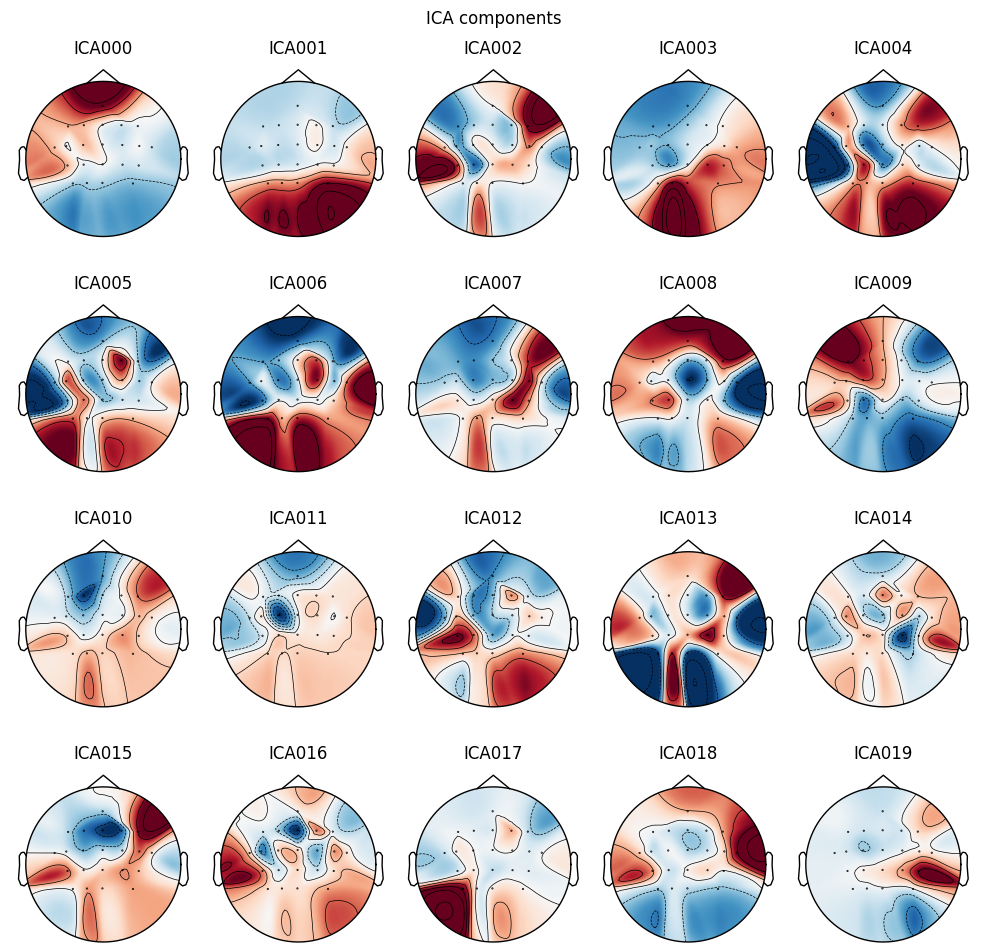

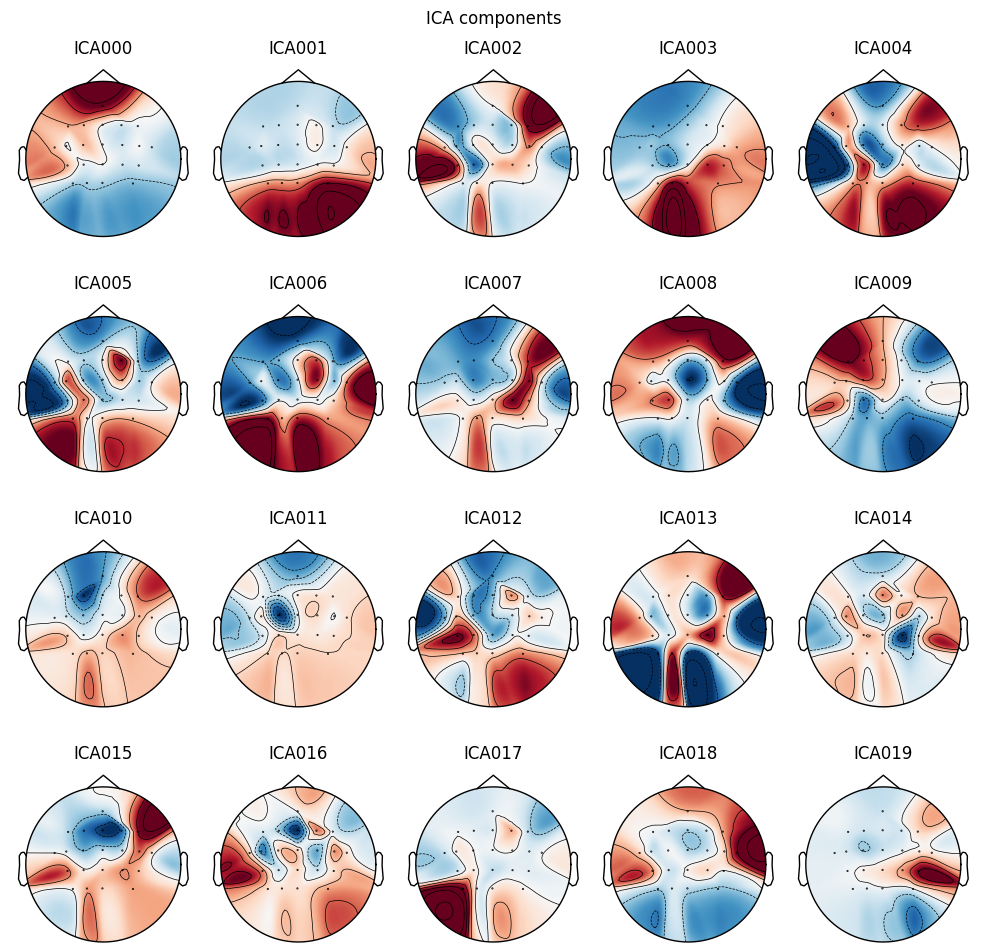

In [50]:


# --- 9. Independent Component Analysis (ICA) for artifact removal ---
ica = mne.preprocessing.ICA(n_components=20, random_state=42)
ica.fit(raw)
ica.plot_components()  # Click on components to mark bad ones

In [57]:
# --- 10. Epoching (cut data into trials) ---
# 1) Keep only desired event codes
wanted = set(event_ids.values())  # e.g., {769, 770, 771, 772}
keep = np.isin(events[:, 2], list(wanted))
events_clean = events[keep]

# 2) Detect duplicates by sample index
samples, counts = np.unique(events_clean[:, 0], return_counts=True)
dup_samples = samples[counts > 1]
print(f"# duplicate sample indices: {len(dup_samples)}")

# 3) Drop duplicates (keep the first occurrence per sample)
valid_codes = set(np.unique(events_nodup[:, 2]))
event_ids = {name: code for name, code in event_ids.items() if code in valid_codes}

print(event_ids)
# Should now only have the keys for codes 5–10

epochs = mne.Epochs(
    raw,
    events_nodup,
    event_id=event_ids,
    tmin=0,
    tmax=4,
    baseline=None,
    preload=True
)
# --- 11. Visualize epochs ---
print("Epochs shape:", epochs.get_data().shape)


# duplicate sample indices: 0
{np.str_('32766'): 5, np.str_('768'): 6, np.str_('769'): 7, np.str_('770'): 8, np.str_('771'): 9, np.str_('772'): 10}
Not setting metadata
585 matching events found


No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 585 events and 1001 original time points ...
0 bad epochs dropped
Epochs shape: (585, 25, 1001)


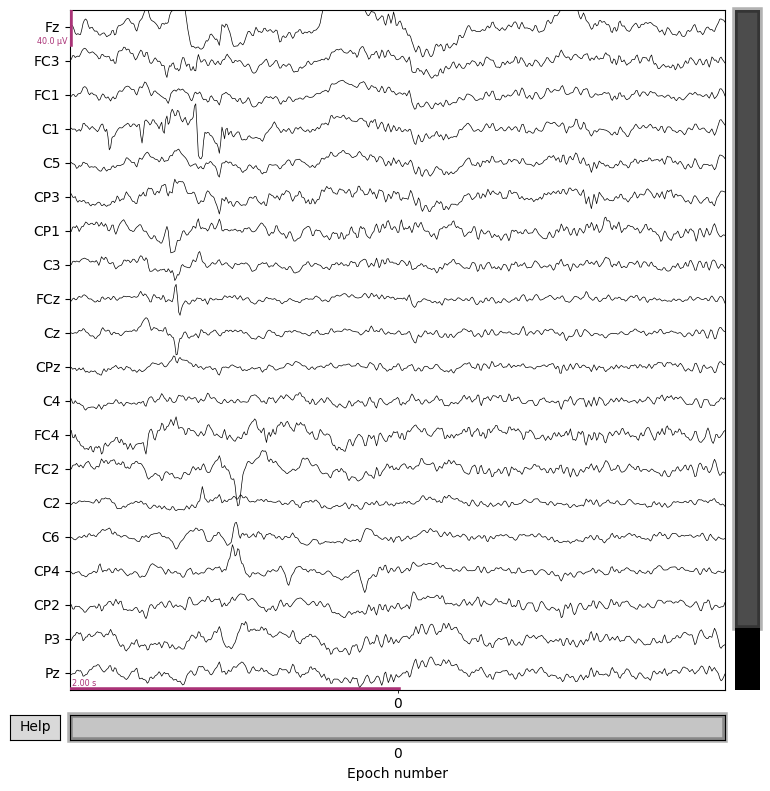

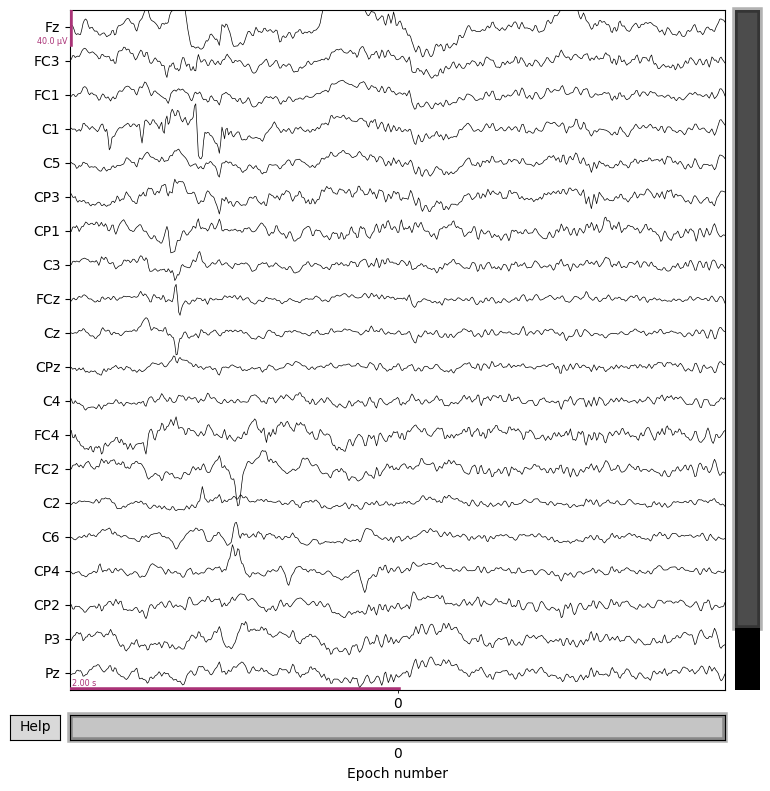

In [58]:
# --- 11. Plot a single trial ---
epochs[0].plot()


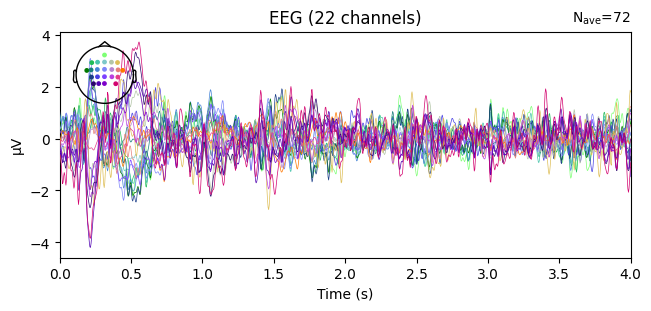

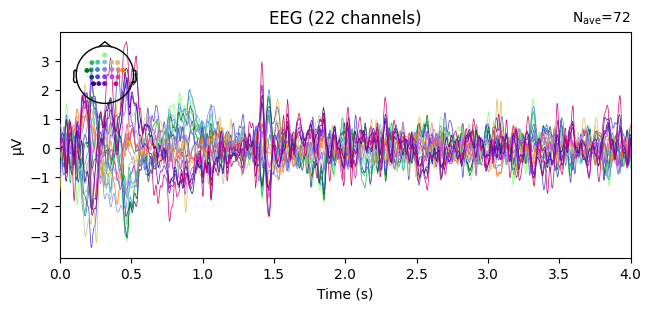

In [59]:
if '769' in event_ids and '770' in event_ids:
    evoked_left = epochs['769'].average()
    evoked_right = epochs['770'].average()
    evoked_left.plot()
    evoked_right.plot()
else:
    print("Warning: Event codes 769/770 not found in event_ids.")

In [ ]:
# --- 13. Save preprocessed data for later phases ---
epochs.save("subject1_epochs-epo.fif", overwrite=True)
print("Preprocessed data saved.")